# Data Analysis
## Class 7
### Data cleaning and Exploratory Data Analysis
#### September 25th

In [118]:
import pandas as pd
import numpy as np
import plotly.express as px
import os

In [119]:
eviMean = pd.read_csv('EVImean.csv')
eviMean.head()

,id_ok,longitude,latitude,km2,DESECON1,DESECON2,DESECON3,DESECON4,X2000032,X2000061,...,X2022274,X2022305,X2022335,X2023001,X2023032,X2023060,X2023091,X2023121,X2023152,X2023182
0,2,-92.240154,14.616329,192.307795,Selvas Calido-Humedas,Planicie Costera y Lomerios del Soconusco,Planicie y Lomerios Costeros del Soconusco con...,Planicie Costera y Lomerios con selva alta per...,0.381080,0.393750,...,0.554377,0.565392,0.490920,0.459002,0.426879,0.431051,0.492495,0.515070,0.526481,0.549757
1,4,-92.380254,14.756429,217.519671,Selvas Calido-Humedas,Planicie Costera y Lomerios del Soconusco,Planicie y Lomerios Costeros del Soconusco con...,Planicie Costera y Lomerios con selva alta per...,0.273232,0.276971,...,0.550199,0.508108,0.388205,0.374693,0.330288,0.332288,0.338711,0.341860,0.437368,0.487972
2,5,-92.240154,14.756429,233.276335,Selvas Calido-Humedas,Planicie Costera y Lomerios del Soconusco,Planicie y Lomerios Costeros del Soconusco con...,Planicie Costera y Lomerios con selva alta per...,0.262070,0.266783,...,0.545053,0.522816,0.422735,0.355143,0.308989,0.307110,0.337750,0.383881,0.513476,0.571744
3,7,-92.520354,14.896529,218.244196,Selvas Calido-Humedas,Planicie Costera y Lomerios del Soconusco,Planicie y Lomerios Costeros del Soconusco con...,Planicie Costera y Lomerios con selva alta per...,0.358763,0.363754,...,0.596631,0.511776,0.437208,0.414366,0.380600,0.400286,0.399786,0.477237,0.521931,0.512213
4,8,-92.380254,14.896529,236.353493,Selvas Calido-Humedas,Planicie Costera y Lomerios del Soconusco,Planicie y Lomerios Costeros del Soconusco con...,Planicie Costera y Lomerios con selva alta per...,0.335840,0.338886,...,0.564563,0.531301,0.457160,0.411877,0.372756,0.389247,0.402691,0.470922,0.548722,0.556070


<AxesSubplot: >

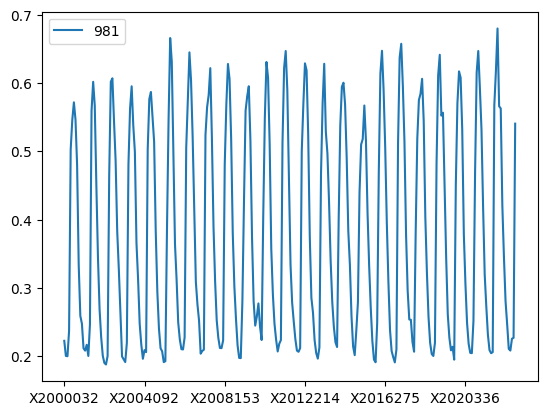

In [120]:
eviMean.sample().iloc[:,8:].transpose().plot()

In [121]:
px.line(eviMean.iloc[8700,8:])

In [122]:
eviMean.iloc[8700, 5]

'Desiertos Calidos'

In [123]:
px.line(eviMean.sample().iloc[:,8:].transpose())

In [124]:
eviMean.iloc[5122, 5]

'Planicie Costera, Lomerios y Canones del Occidente'

## Groupby

In [125]:
regions = eviMean.groupby(by='DESECON1')

In [126]:
regions.groups.keys()

dict_keys(['California Mediterranea', 'Desiertos de America del Norte', 'Elevaciones Semiaridas Meridionales', 'Grandes Planicies', 'Selvas Calido-Humedas', 'Selvas Calido-Secas', 'Sierras Templadas'])

In [127]:
regions.size().sort_values()

DESECON1
California Mediterranea                 119
Grandes Planicies                       489
Elevaciones Semiaridas Meridionales    1058
Selvas Calido-Humedas                  1200
Selvas Calido-Secas                    1423
Sierras Templadas                      1928
Desiertos de America del Norte         2577
dtype: int64

In [128]:
reg1 = regions.get_group('Desiertos de America del Norte')

In [129]:
reg1.head()

,id_ok,longitude,latitude,km2,DESECON1,DESECON2,DESECON3,DESECON4,X2000032,X2000061,...,X2022274,X2022305,X2022335,X2023001,X2023032,X2023060,X2023091,X2023121,X2023152,X2023182
3222,3316,-99.805554,21.621329,222.815667,Desiertos de America del Norte,Desiertos Calidos,Desierto Chihuahuense,Planicies del Altiplano Zacatecano-Potosino co...,0.160945,0.165068,...,0.350151,0.313900,0.299278,0.201708,0.160254,0.157356,0.159249,0.175464,0.192033,0.182492
3270,3367,-100.926354,21.761429,222.569249,Desiertos de America del Norte,Desiertos Calidos,Desierto Chihuahuense,Planicies del Altiplano Zacatecano-Potosino co...,0.160917,0.169971,...,0.261451,0.212997,0.191341,0.166828,0.153103,0.164724,0.177433,0.204699,0.225996,0.225684
3327,3424,-100.926354,21.901529,222.324198,Desiertos de America del Norte,Desiertos Calidos,Desierto Chihuahuense,Planicies del Altiplano Zacatecano-Potosino co...,0.138129,0.146591,...,0.265421,0.210638,0.184922,0.159277,0.141992,0.147725,0.160331,0.171418,0.181015,0.193701
3328,3425,-100.786254,21.901529,222.324198,Desiertos de America del Norte,Desiertos Calidos,Desierto Chihuahuense,Planicies del Altiplano Zacatecano-Potosino co...,0.113487,0.124050,...,0.220094,0.172908,0.154411,0.131061,0.113505,0.120184,0.136962,0.162148,0.175997,0.168276
3334,3431,-99.945654,21.901529,222.324198,Desiertos de America del Norte,Desiertos Calidos,Desierto Chihuahuense,Planicies del Altiplano Zacatecano-Potosino co...,0.165141,0.184403,...,0.355976,0.285438,0.245578,0.215332,0.178375,0.182429,0.244910,0.279941,0.250646,0.233376


the temporal information is given by the index

In [130]:
reg1.columns

Index(['id_ok', 'longitude', 'latitude', 'km2', 'DESECON1', 'DESECON2',
       'DESECON3', 'DESECON4', 'X2000032', 'X2000061',
       ...
       'X2022274', 'X2022305', 'X2022335', 'X2023001', 'X2023032', 'X2023060',
       'X2023091', 'X2023121', 'X2023152', 'X2023182'],
      dtype='object', length=290)

In [131]:
new_indexes_year = [int(s[:4]) for s in reg1.columns[8:].str.split('X').str[-1]]
new_indexes_year

[2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2010,
 2010,
 2010,
 2010,
 2010,
 2010,
 2010,
 2010,
 2010,
 2010,
 2010,
 2010,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,

In [132]:
new_indexes = list(eviMean.columns[:8])
new_indexes

['id_ok',
 'longitude',
 'latitude',
 'km2',
 'DESECON1',
 'DESECON2',
 'DESECON3',
 'DESECON4']

In [133]:
new_indexes = new_indexes + new_indexes_year
new_indexes

['id_ok',
 'longitude',
 'latitude',
 'km2',
 'DESECON1',
 'DESECON2',
 'DESECON3',
 'DESECON4',
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2008,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2010,
 2010,
 2010,
 2010,
 2010,
 2010,
 2010,
 2010,
 2010,
 2010,


In [134]:
eviMean = eviMean.set_axis(new_indexes, axis=1)
eviMean

,id_ok,longitude,latitude,km2,DESECON1,DESECON2,DESECON3,DESECON4,2000,2000,...,2022,2022,2022,2023,2023,2023,2023,2023,2023,2023
0,2,-92.240154,14.616329,192.307795,Selvas Calido-Humedas,Planicie Costera y Lomerios del Soconusco,Planicie y Lomerios Costeros del Soconusco con...,Planicie Costera y Lomerios con selva alta per...,0.381080,0.393750,...,0.554377,0.565392,0.490920,0.459002,0.426879,0.431051,0.492495,0.515070,0.526481,0.549757
1,4,-92.380254,14.756429,217.519671,Selvas Calido-Humedas,Planicie Costera y Lomerios del Soconusco,Planicie y Lomerios Costeros del Soconusco con...,Planicie Costera y Lomerios con selva alta per...,0.273232,0.276971,...,0.550199,0.508108,0.388205,0.374693,0.330288,0.332288,0.338711,0.341860,0.437368,0.487972
2,5,-92.240154,14.756429,233.276335,Selvas Calido-Humedas,Planicie Costera y Lomerios del Soconusco,Planicie y Lomerios Costeros del Soconusco con...,Planicie Costera y Lomerios con selva alta per...,0.262070,0.266783,...,0.545053,0.522816,0.422735,0.355143,0.308989,0.307110,0.337750,0.383881,0.513476,0.571744
3,7,-92.520354,14.896529,218.244196,Selvas Calido-Humedas,Planicie Costera y Lomerios del Soconusco,Planicie y Lomerios Costeros del Soconusco con...,Planicie Costera y Lomerios con selva alta per...,0.358763,0.363754,...,0.596631,0.511776,0.437208,0.414366,0.380600,0.400286,0.399786,0.477237,0.521931,0.512213
4,8,-92.380254,14.896529,236.353493,Selvas Calido-Humedas,Planicie Costera y Lomerios del Soconusco,Planicie y Lomerios Costeros del Soconusco con...,Planicie Costera y Lomerios con selva alta per...,0.335840,0.338886,...,0.564563,0.531301,0.457160,0.411877,0.372756,0.389247,0.402691,0.470922,0.548722,0.556070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,9056,-115.076454,32.549129,207.397758,Desiertos de America del Norte,Desiertos Calidos,Desierto Sonorense,"Desiertos del Alto Golfo (Altar, El Pinacate, ...",0.314020,0.333779,...,0.206834,0.183461,0.195868,0.251587,0.320975,0.362174,0.347984,0.279173,0.236480,0.240608
8790,9057,-114.936354,32.549129,207.397758,Desiertos de America del Norte,Desiertos Calidos,Desierto Sonorense,"Desiertos del Alto Golfo (Altar, El Pinacate, ...",0.380256,0.400324,...,0.205756,0.184203,0.180931,0.245938,0.326014,0.371081,0.357734,0.271276,0.212631,0.220352
8791,9062,-115.076454,32.689229,111.632759,Desiertos de America del Norte,Desiertos Calidos,Desierto Sonorense,"Desiertos del Alto Golfo (Altar, El Pinacate, ...",0.134405,0.136716,...,0.152442,0.141836,0.131686,0.119994,0.126669,0.142873,0.153282,0.148710,0.141871,0.143751
8792,9063,-114.936354,32.689229,125.677418,Desiertos de America del Norte,Desiertos Calidos,Desierto Sonorense,"Desiertos del Alto Golfo (Altar, El Pinacate, ...",0.257072,0.274016,...,0.155607,0.151480,0.154335,0.190418,0.252042,0.274826,0.270774,0.217226,0.194162,0.191370
